In [18]:
import os
# Assign training and validation set directories
base_dir = './Week_1\cats_and_dogs_filtered\cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [19]:
os.path.isdir(train_dir)

True

In [20]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from keras.models import Model, Input
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [26]:
def create_model():
    inputs = Input(shape=(150, 150, 3))
    x = Conv2D(32, (3,3), activation='relu')(inputs)
    x = MaxPool2D(2, 2)(x)

    x = Conv2D(64, (3,3), activation='relu')(x)
    x = MaxPool2D(2, 2)(x)

    x = Conv2D(128, (3,3), activation='relu')(x)
    x = MaxPool2D(2, 2)(x)

    x = Conv2D(128, (3,3), activation='relu')(x)
    x = MaxPool2D(2, 2)(x)

    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model =  Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=RMSprop(learning_rate=0.001),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
    return model

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
train_generator =  train_datagen.flow_from_directory(
    train_dir, batch_size=20, target_size=(150, 150),
    class_mode='binary'
)
validation_generator =  validation_datagen.flow_from_directory(
    validation_dir, batch_size=20, target_size=(150, 150),
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
EPOCHS = 20
model = create_model()
history = model.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator, validation_steps=50, verbose=2)

Epoch 1/20
100/100 - 22s - loss: 0.7404 - accuracy: 0.5200 - val_loss: 0.6472 - val_accuracy: 0.6030 - 22s/epoch - 220ms/step
Epoch 2/20
100/100 - 22s - loss: 0.6829 - accuracy: 0.5695 - val_loss: 0.6774 - val_accuracy: 0.5850 - 22s/epoch - 219ms/step
Epoch 3/20
100/100 - 21s - loss: 0.6500 - accuracy: 0.6545 - val_loss: 0.6220 - val_accuracy: 0.6540 - 21s/epoch - 214ms/step
Epoch 4/20
100/100 - 22s - loss: 0.5918 - accuracy: 0.6905 - val_loss: 0.5890 - val_accuracy: 0.6730 - 22s/epoch - 218ms/step
Epoch 5/20
100/100 - 22s - loss: 0.5393 - accuracy: 0.7270 - val_loss: 0.5794 - val_accuracy: 0.7210 - 22s/epoch - 216ms/step
Epoch 6/20
100/100 - 21s - loss: 0.4938 - accuracy: 0.7710 - val_loss: 0.5864 - val_accuracy: 0.7010 - 21s/epoch - 211ms/step
Epoch 7/20
100/100 - 22s - loss: 0.4409 - accuracy: 0.7925 - val_loss: 0.7053 - val_accuracy: 0.7100 - 22s/epoch - 219ms/step
Epoch 8/20
100/100 - 22s - loss: 0.3909 - accuracy: 0.8220 - val_loss: 0.5717 - val_accuracy: 0.7350 - 22s/epoch - 217

In [29]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

## Data augmentation

In [30]:
model_aug = create_model()
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode = 'nearest'
)
test_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                    batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                        batch_size=20, class_mode='binary')
# Train the new model
history_with_aug = model_aug.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 25s - loss: 0.7162 - accuracy: 0.5065 - val_loss: 0.6893 - val_accuracy: 0.5060 - 25s/epoch - 246ms/step
Epoch 2/20
100/100 - 23s - loss: 0.6875 - accuracy: 0.5780 - val_loss: 0.6921 - val_accuracy: 0.5600 - 23s/epoch - 234ms/step
Epoch 3/20
100/100 - 24s - loss: 0.6825 - accuracy: 0.6005 - val_loss: 0.6231 - val_accuracy: 0.6280 - 24s/epoch - 237ms/step
Epoch 4/20
100/100 - 26s - loss: 0.6573 - accuracy: 0.6200 - val_loss: 0.6363 - val_accuracy: 0.6200 - 26s/epoch - 260ms/step
Epoch 5/20
100/100 - 26s - loss: 0.6397 - accuracy: 0.6475 - val_loss: 0.6256 - val_accuracy: 0.6200 - 26s/epoch - 261ms/step
Epoch 6/20
100/100 - 26s - loss: 0.6404 - accuracy: 0.6485 - val_loss: 0.6419 - val_accuracy: 0.6350 - 26s/epoch - 262ms/step
Epoch 7/20
100/100 - 24s - loss: 0.6133 - accuracy: 0.6675 - val_loss: 0.6911 - val_accuracy: 0.6330 - 24s/epoch - 241ms/step
Epoch 8/20
100/100 - 25s - loss: 0

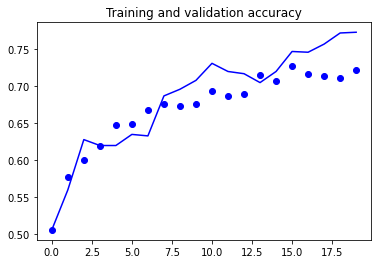

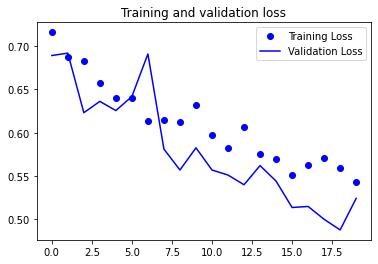

In [31]:
# Plot the results of training with data augmentation
plot_loss_acc(history_with_aug)

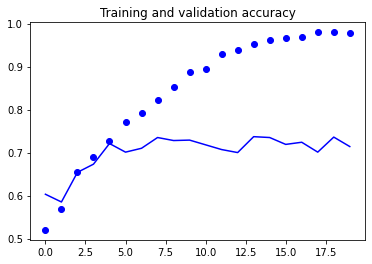

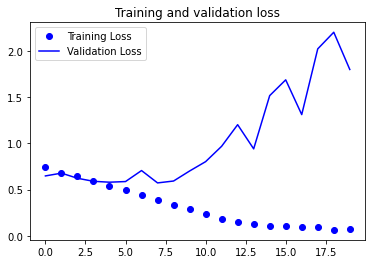

In [34]:
# Plot the results of training without data augmentation
plot_loss_acc(history)